In [1]:
import jieba
import jieba.analyse
import math
from collections import Counter

In [2]:
with open("hw1-dataset.txt", "r") as fd:
    data = fd.read().splitlines()
#print(data)
jieba.set_dictionary('dict.txt.big')
stopwords = [line.strip() for line in open("stop_words.txt",encoding="utf-8").readlines()]  

size = len(data)

new_list = []
for i in range(size):
    new_list.append([])
    
for i in range(size):
    new_list[i] = jieba.lcut(data[i])

#print(new_list)
word = []
for i in range(size):
    word.append([])
for i in range(size):
    for seg in new_list[i]:
        if seg not in stopwords:
            if seg == " ":  
                continue  
            else:  
                word[i].append(seg)

#print(word)

Building prefix dict from /Users/marina/Documents/GitHub/NLP_HW1/dict.txt.big ...
Loading model from cache /var/folders/wf/26_5_j6173n3fyjcdd29_r3r0000gn/T/jieba.u679c42d08b25284bf1a3bc8ecfdc9e37.cache
Loading model cost 1.084 seconds.
Prefix dict has been built successfully.


In [202]:
words_count = []
tmp = {}
for file in word:
    count = {}
    
    for w in file:
        if w in count:
            count[w] += 1
            tmp[w]+=1
        else:
            count[w] = 1
            tmp[w]=1
    words_count.append(count)
    #print(count)
    #print(tmp)
#print(words_count)

ttf = list(tmp.items())  
#ttf.sort(key=lambda x:x[1], reverse=True)   
tw = []
tc = []
for i in range(100):  
    word, count = ttf[i+1]  
    tw.append(word)
    tc.append(count)
    print(f'number {i} : {word} {count}')

#計算tf
words_frequency = []
for word_count in words_count:
    all_count = sum(word_count.values())
    fre = {}
    for word,count in word_count.items():
        fre[word] = round(count/all_count,4)
    words_frequency.append(fre)
#print(words_frequency)

number 0 : 擱下 1
number 1 : 一塊 1
number 2 : 陰影 1
number 3 : 聆聽 1
number 4 : 沉寂已久 1
number 5 : 心情 1
number 6 : 清晰 1
number 7 : 透明 1
number 8 : 美麗 1
number 9 : 風景 1
number 10 : 總在 1
number 11 : 回憶 1
number 12 : 裡才 1
number 13 : 清 1
number 14 : 傷透 1
number 15 : 心 1
number 16 : 能不能夠 1
number 17 : 愛我 1
number 18 : 用力 1
number 19 : 牽起 1
number 20 : 溫度 1
number 21 : 雙手 1
number 22 : 過往 1
number 23 : 溫柔 1
number 24 : 上鎖 1
number 25 : 剩揮散 1
number 26 : 難過 1
number 27 : 緩緩 1
number 28 : 飄落 1
number 29 : 楓葉 1
number 30 : 思念 1
number 31 : 點燃 1
number 32 : 燭火 1
number 33 : 溫暖 1
number 34 : 歲末 1
number 35 : 秋天 1
number 36 : 極光 1
number 37 : 掠奪 1
number 38 : 天邊 1
number 39 : 北風 1
number 40 : 掠過 1
number 41 : 想 1
number 42 : 容顏 1
number 43 : 愛 1
number 44 : 燒成 1
number 45 : 落葉 1
number 46 : 卻換 1
number 47 : 不回 1
number 48 : 熟悉 1
number 49 : 張臉 1
number 50 : 挽回 1
number 51 : 冬天 1
number 52 : 愛你 1
number 53 : 穿越 1
number 54 : 兩行 1
number 55 : 秋末 1
number 56 : 眼淚 1
number 57 : 滲透 1
number 58 : 地面 1
number

IndexError: list index out of range

In [193]:
#idf
all_words = []
for words in words_count:
    all_words.extend(words.keys())
    
occurrences_of_word = {}
for word in all_words:
    if word in occurrences_of_word:
        occurrences_of_word[word] += 1
    else:
        occurrences_of_word[word] = 1

        
items = list(occurrences_of_word.items())  
items.sort(key=lambda x:x[1], reverse=True)   
w = []
c = []
print(f'詞頻')
for i in range(60):  
    word, count = items[i]  
    w.append(word)
    c.append(count)
    print(f'number {i} : {word} {count}')
        
inverse_document_frequency = []     
for word_count in words_count:
    invFre = {} 
    for word in word_count.keys():
        occurrences = occurrences_of_word[word]
        invFre[word] = math.log(round((len(words_count)/occurrences),4))
    inverse_document_frequency.append(invFre)
    
#print(inverse_document_frequency)
#print(all_words)

詞頻
number 0 : 冰 1


IndexError: list index out of range

In [178]:
all_tf_idf = []
for i,words in enumerate(words_frequency):
    tf_idf = {}
    for word,freq in words.items():
        print(word,freq)
        tf_idf[word] = freq*inverse_document_frequency[i][word]
    all_tf_idf.append(tf_idf)
print(all_tf_idf)

烏雲 0.4
擱下 0.2
一塊 0.2
陰影 0.2
聆聽 0.3333
沉寂已久 0.3333
心情 0.3333
清晰 0.25
透明 0.25
美麗 0.25
風景 0.25
總在 0.25
回憶 0.25
裡才 0.25
清 0.25
傷透 0.25
心 0.25
能不能夠 0.25
愛我 0.25
用力 0.25
牽起 0.25
溫度 0.25
雙手 0.25
過往 0.3333
溫柔 0.3333
上鎖 0.3333
剩揮散 0.5
難過 0.5
緩緩 0.25
飄落 0.25
楓葉 0.25
思念 0.25
點燃 0.2
燭火 0.2
溫暖 0.2
歲末 0.2
秋天 0.2
極光 0.1429
掠奪 0.1429
天邊 0.1429
北風 0.1429
掠過 0.1429
想 0.1429
容顏 0.1429
愛 0.3333
燒成 0.3333
落葉 0.3333
卻換 0.25
不回 0.25
熟悉 0.25
張臉 0.25
緩緩 0.25
飄落 0.25
楓葉 0.25
思念 0.25
挽回 0.5
冬天 0.5
愛你 0.2
穿越 0.2
兩行 0.2
秋末 0.2
眼淚 0.2
愛 0.3333
滲透 0.3333
地面 0.3333
我要 0.5
身邊 0.5
傷透 0.25
心 0.25
能不能夠 0.25
愛我 0.25
用力 0.25
牽起 0.25
溫度 0.25
雙手 0.25
過往 0.3333
溫柔 0.3333
上鎖 0.3333
剩揮散 0.5
難過 0.5
山 0.25
腰間 0.25
飄逸 0.25
紅雨 0.25
北風 0.2
凋零 0.2
輕輕 0.2
搖曳 0.2
風鈴 0.2
想 0.25
喚醒 0.25
被遺棄 0.25
愛情 0.25
雪花 0.1429
鋪滿 0.1429
深怕 0.1429
窗外 0.1429
楓葉 0.1429
結成 0.1429
冰 0.1429
緩緩 0.25
飄落 0.25
楓葉 0.25
思念 0.25
點燃 0.2
燭火 0.2
溫暖 0.2
歲末 0.2
秋天 0.2
極光 0.1429
掠奪 0.1429
天邊 0.1429
北風 0.1429
掠過 0.1429
想 0.1429
容顏 0.1429
愛 0.3333
燒成 0.3333
落葉 0.3333
卻換 0

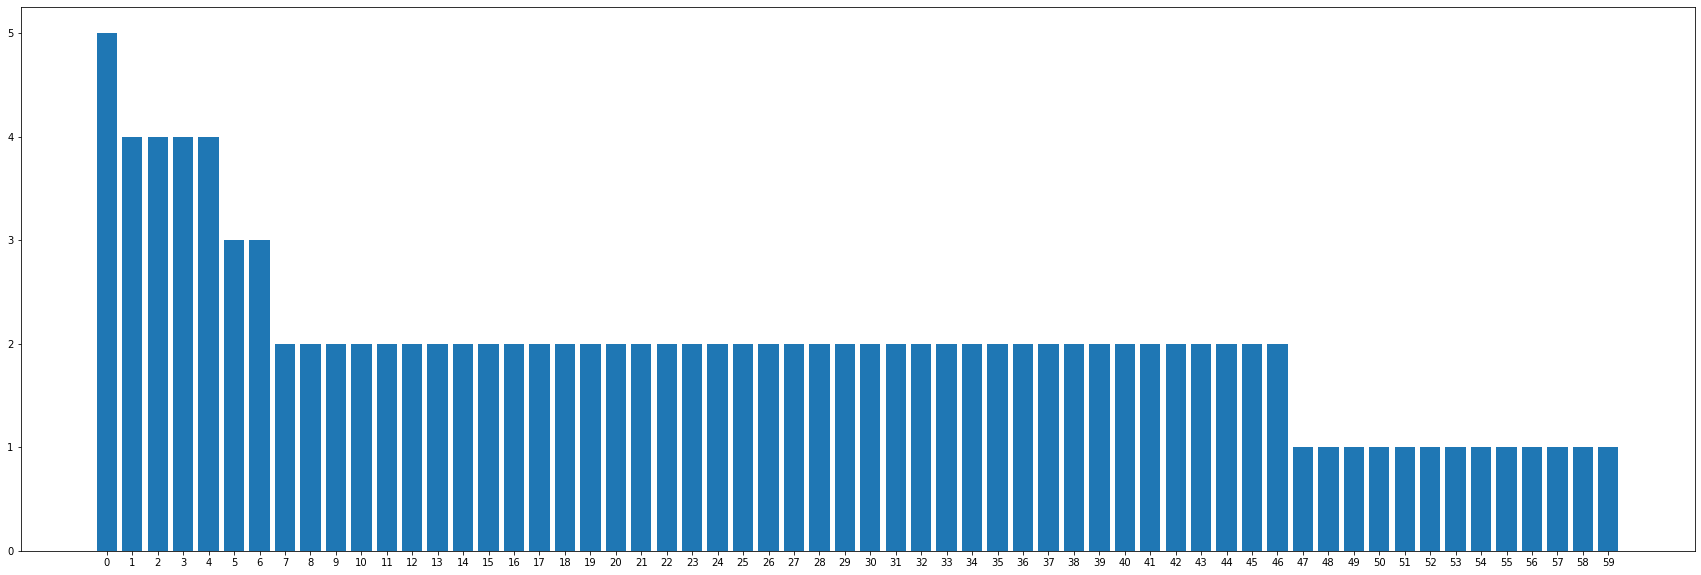

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))
label = []
for i in range(60):
    label.append(i)
    
plt.bar(w,c,tick_label=label)
plt.savefig('bar.png')
plt.show()